Author: Prabaningrum Hendraswari Buditjahjono

In [66]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from feature_engine.outliers import Winsorizer

import datetime
import warnings
warnings.filterwarnings('ignore')

**Introduction**

Obtained from [Kaggle](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting), this dataset contains what is assumed to be retail data from an unnamed global superstore in a span of 4 years. This dataframe contains 18 features/columns that are self explanatory. 

In [3]:
df = pd.read_csv('SuperstoreData.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Are the orders only from the US? if so, we can get rid of the country column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

There are missing values in the postal code. Not a big deal, but it becomes a question on how the package gets delivered in the first place.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9800.0,4900.500000,2829.160653,1.000,2450.750,4900.50,7350.250,9800.00
Postal Code,9789.0,55273.322403,32041.223413,1040.000,23223.000,58103.00,90008.000,99301.00
Sales,9800.0,230.769059,626.651875,0.444,17.248,54.49,210.605,22638.48


In [6]:
df['Sales'].sort_values(ascending=True)

4101        0.444
9292        0.556
8658        0.836
4711        0.852
2106        0.876
          ...    
4190    10499.970
2623    11199.968
8153    13999.960
6826    17499.950
2697    22638.480
Name: Sales, Length: 9800, dtype: float64

In [7]:
print(df['Sales'].min())
print(df['Sales'].max())

0.444
22638.48


In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [10]:
print(df['Order Date'].min())
print(df['Order Date'].max())
print(df['Ship Date'].min())
print(df['Ship Date'].max())

2015-01-02 00:00:00
2018-12-30 00:00:00
2015-01-04 00:00:00
2019-05-01 00:00:00


In [61]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

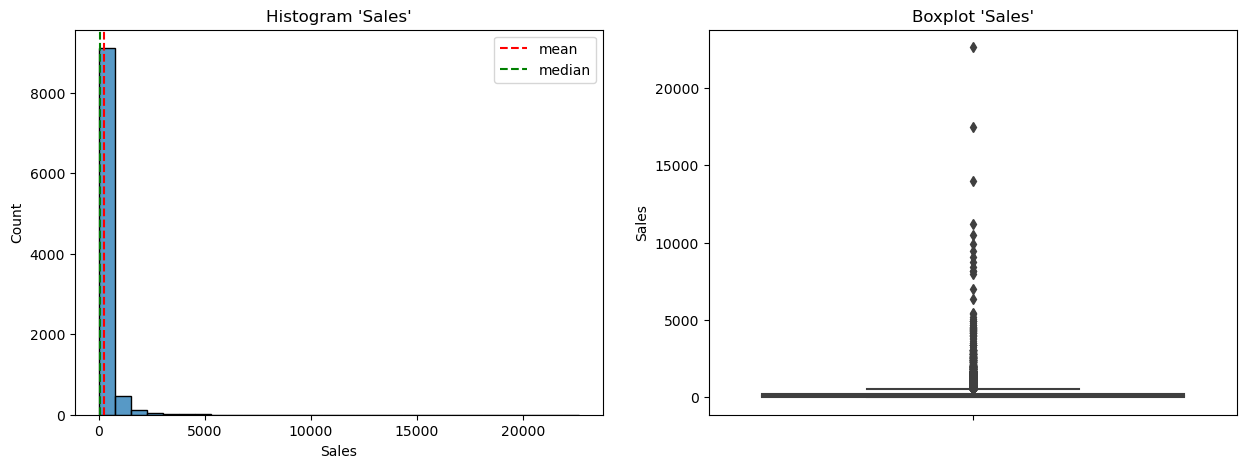

Sales Kurtosis: 304.4450883210413
Sales Skewness: 12.983482865034619
Columns 'Sales' right skewed


In [62]:
# checking data distribution of sales
plot_dist(df,'Sales')

There are outliers in the sales data. due to the low ammount of data to work with these outliers will be winsorized.


In [75]:
dfw = df
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3,variables=['Sales'])
winsorizer.fit(dfw)
dfw = winsorizer.transform(dfw)

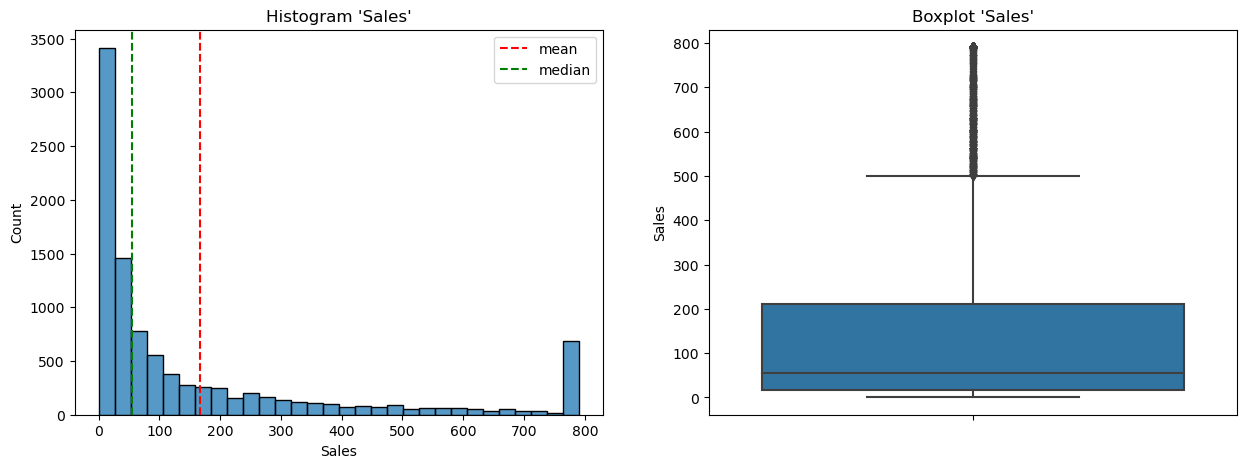

Sales Kurtosis: 1.693719832594129
Sales Skewness: 1.6997617085453127
Columns 'Sales' right skewed


In [77]:
plot_dist(dfw,'Sales')

In [78]:
dfm= dfw
dfm.index=dfm['Order Date']
dfms=pd.DataFrame(dfm.groupby(pd.Grouper(freq='Y'))['Sales'].sum())
dfms

,Sales
Order Date,
2015-12-31,334461.0951
2016-12-31,352211.5939
2017-12-31,422274.6448
2018-12-31,521986.7627


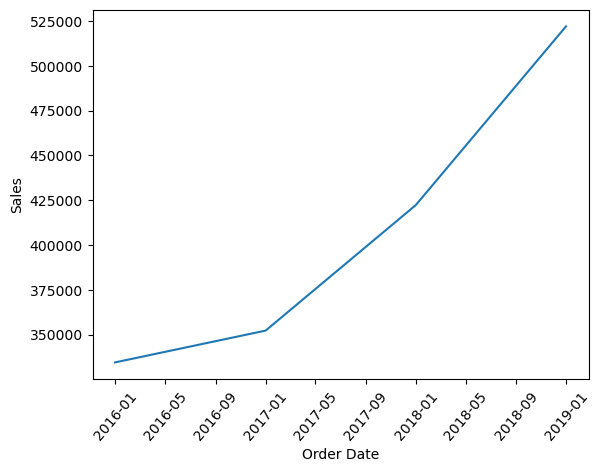

In [79]:
# Plotting monthly total sales.
sns.lineplot(x='Order Date',y='Sales',data=dfms)
plt.xticks(rotation=50)
plt.show()

In [80]:
dfm15=dfm[dfm['Order Date'].dt.year==2015]
dfm16=dfm[dfm['Order Date'].dt.year==2016]
dfm17=dfm[dfm['Order Date'].dt.year==2017]
dfm18=dfm[dfm['Order Date'].dt.year==2018]

dfm15=pd.DataFrame(dfm15.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm16=pd.DataFrame(dfm16.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm17=pd.DataFrame(dfm17.groupby(pd.Grouper(freq='M'))['Sales'].sum())
dfm18=pd.DataFrame(dfm18.groupby(pd.Grouper(freq='M'))['Sales'].sum())

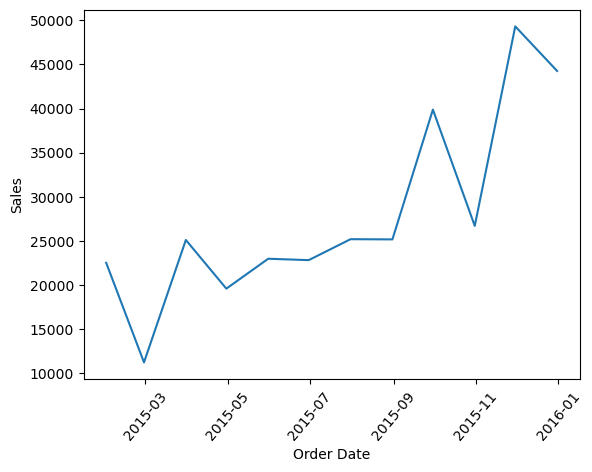

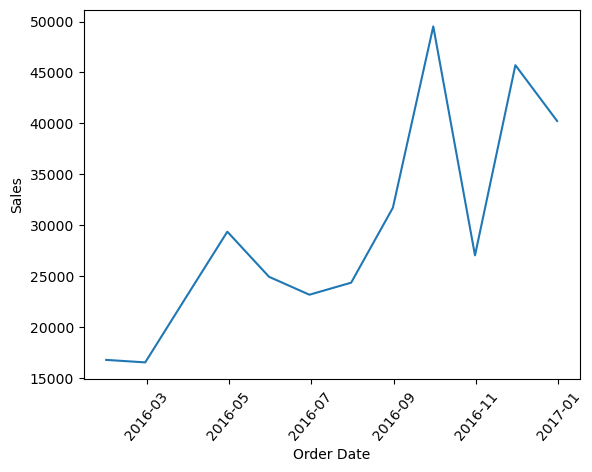

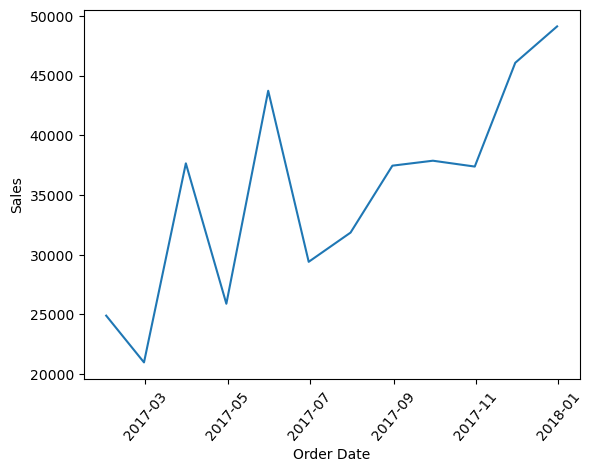

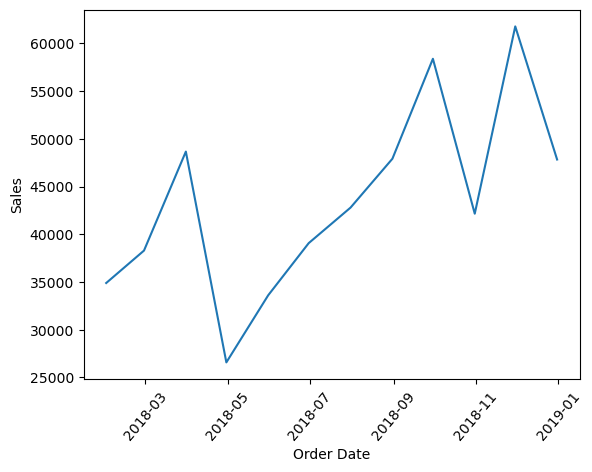

In [81]:
# Plotting monthly total sales by year.
sns.lineplot(x='Order Date',y='Sales',data=dfm15)
plt.xticks(rotation=50)
plt.show()
sns.lineplot(x='Order Date',y='Sales',data=dfm16)
plt.xticks(rotation=50)
plt.show()
sns.lineplot(x='Order Date',y='Sales',data=dfm17)
plt.xticks(rotation=50)
plt.show()
sns.lineplot(x='Order Date',y='Sales',data=dfm18)
plt.xticks(rotation=50)
plt.show()